In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import missingno as msno

In [26]:
#cargamos datasets homicidios_hechos.csv
homicidios_hechos = pd.read_csv('../dataset/homicidios_hechos.csv')
#cargamos datasets homicidios_victimas.csv
homicidios_victimas = pd.read_csv('../dataset/homicidios_victimas.csv')

# HOMICIDIOS_HECHOS_HOJA

In [27]:
homicidios_hechos.head(3)

,Unnamed: 0,ID,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,COMUNA,pos x,pos y,VICTIMA,ACUSADO,N_VICTIMAS
0,0,2016-0001,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,8,-58.47533969,-34.68757022,MOTO,AUTO,1
1,1,2016-0002,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,9,-58.50877521,-34.66977709,AUTO,PASAJEROS,1
2,2,2016-0003,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,1,-58.39040293,-34.63189362,MOTO,AUTO,1


In [28]:
homicidios_hechos.dtypes

Unnamed: 0          int64
ID                 object
FECHA              object
AAAA                int64
MM                  int64
DD                  int64
HH                 object
LUGAR_DEL_HECHO    object
COMUNA              int64
pos x              object
pos y              object
VICTIMA            object
ACUSADO            object
N_VICTIMAS          int64
dtype: object

In [29]:
# Identificar valores nulos
valores_nulos = homicidios_hechos.isnull().sum()
valores_nulos


Unnamed: 0         0
ID                 0
FECHA              0
AAAA               0
MM                 0
DD                 0
HH                 0
LUGAR_DEL_HECHO    0
COMUNA             0
pos x              0
pos y              0
VICTIMA            0
ACUSADO            0
N_VICTIMAS         0
dtype: int64

In [30]:
homicidios_victimas['EDAD'].nunique()

86

## Analisis de los datos

Se agrupan columnas victima y numero  de victimas

In [31]:
homicidios_hechos2 =homicidios_hechos.groupby('VICTIMA').agg({'N_VICTIMAS': 'sum'}).reset_index()
homicidios_hechos2

,VICTIMA,N_VICTIMAS
0,AUTO,92
1,BICICLETA,29
2,CARGAS,7
3,MOTO,302
4,MOVIL,3
5,OBJETO FIJO,2
6,PASAJEROS,5
7,PEATON,266
8,PEATON_MOTO,2
9,SD,9


NUMERO TOTAL DE HOMICIDIOS

In [32]:
homicidios_hechos2['N_VICTIMAS'].sum()

717

NUMERO DE HOMICIDIOS POR DIA

In [33]:
homicidios_hechos_dia =homicidios_hechos.groupby('DD').agg({'N_VICTIMAS': 'sum'}).reset_index()
homicidios_hechos_dia

,DD,N_VICTIMAS
0,1,18
1,2,24
2,3,28
3,4,23
4,5,19
5,6,20
6,7,23
7,8,14
8,9,27
9,10,26


# Total de homicidios por mes

In [34]:
homicidios_hechos_mes =homicidios_hechos.groupby('MM').agg({'N_VICTIMAS': 'sum'}).reset_index()
homicidios_hechos_mes

,MM,N_VICTIMAS
0,1,62
1,2,59
2,3,56
3,4,52
4,5,60
5,6,58
6,7,51
7,8,67
8,9,51
9,10,52


NUMERO DE VICTIMAS DE POR COMUNA

In [35]:
homicidios_hechos_comuna =homicidios_hechos.groupby('COMUNA').agg({'N_VICTIMAS': 'sum'}).reset_index()
homicidios_hechos_comuna

,COMUNA,N_VICTIMAS
0,0,2
1,1,93
2,2,25
3,3,46
4,4,79
5,5,22
6,6,22
7,7,62
8,8,67
9,9,75


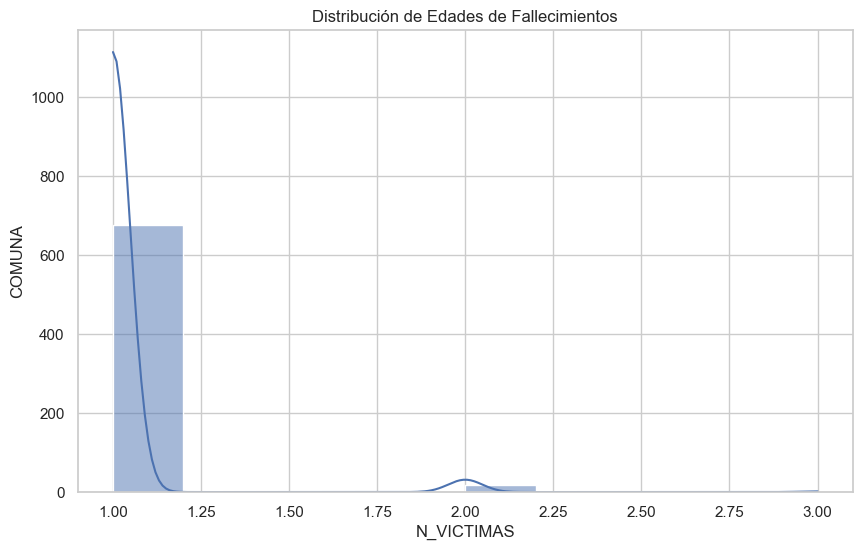

In [36]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(homicidios_hechos['N_VICTIMAS'], bins=10, kde=True)
plt.title('Distribución de Edades de Fallecimientos')
plt.xlabel('N_VICTIMAS')
plt.ylabel('COMUNA')
plt.show()

# HOMICIDIOS_VICTIMAS_HOJA

In [37]:
homicidios_victimas.head(3)

,Unnamed: 0,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
0,0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30


In [38]:
homicidios_victimas.dtypes

Unnamed: 0     int64
ID_hecho      object
FECHA         object
AAAA           int64
MM             int64
DD             int64
ROL           object
VICTIMA       object
SEXO          object
EDAD          object
dtype: object

In [39]:
# Identificar valores nulos
valores_nulos2 = homicidios_victimas.isnull().sum()
valores_nulos2


Unnamed: 0    0
ID_hecho      0
FECHA         0
AAAA          0
MM            0
DD            0
ROL           0
VICTIMA       0
SEXO          0
EDAD          0
dtype: int64

In [40]:
homicidios_victimas['EDAD'] = pd.to_numeric(homicidios_victimas['EDAD'], errors='coerce')
homicidios_hechos['HH'] = pd.to_numeric(homicidios_hechos['HH'], errors='coerce')

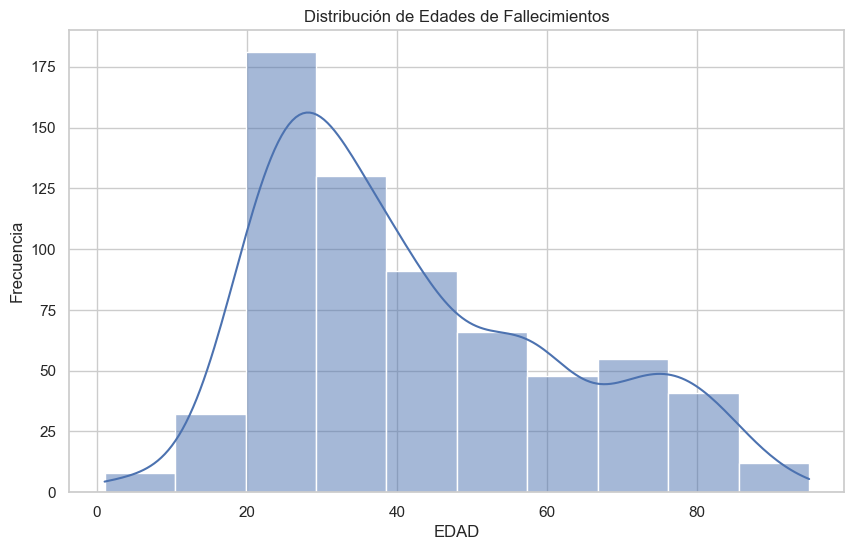

In [41]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(homicidios_victimas['EDAD'], bins=10, kde=True)
plt.title('Distribución de Edades de Fallecimientos')
plt.xlabel('EDAD')
plt.ylabel('Frecuencia')
plt.show()

In [42]:
homicidios_victimas['EDAD'].replace(np.nan, round(np.mean(homicidios_victimas['EDAD']),0), inplace= True)
homicidios_hechos['HH'].replace(np.nan, round(np.mean(homicidios_hechos['HH']),0), inplace= True)

C:\Users\BORDADO Y ESTAMPADO\AppData\Local\Temp\ipykernel_18628\2210387083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  homicidios_victimas['EDAD'].replace(np.nan, round(np.mean(homicidios_victimas['EDAD']),0), inplace= True)
C:\Users\BORDADO Y ESTAMPADO\AppData\Local\Temp\ipykernel_18628\2210387083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the 

# Analisis de los datos de el dataset victimas

#### Aqui obtendremos la relacion entre columnas de 'SEXO' 'EDAD', para poder identificar el genero y edad de las victimas

In [43]:
# Agrupar por EDAD y SEXO y contar el número de ocurrencias
homicidios_victimas_genero = homicidios_victimas.groupby(['EDAD', 'SEXO']).size().reset_index(name='count').reset_index()
homicidios_victimas_genero


,index,EDAD,SEXO,count
0,0,1.0,MASCULINO,2
1,1,4.0,MASCULINO,2
2,2,5.0,MASCULINO,1
3,3,7.0,FEMENINO,1
4,4,10.0,MASCULINO,2
...,...,...,...,...
138,138,87.0,MASCULINO,3
139,139,88.0,MASCULINO,1
140,140,91.0,MASCULINO,2
141,141,92.0,FEMENINO,1


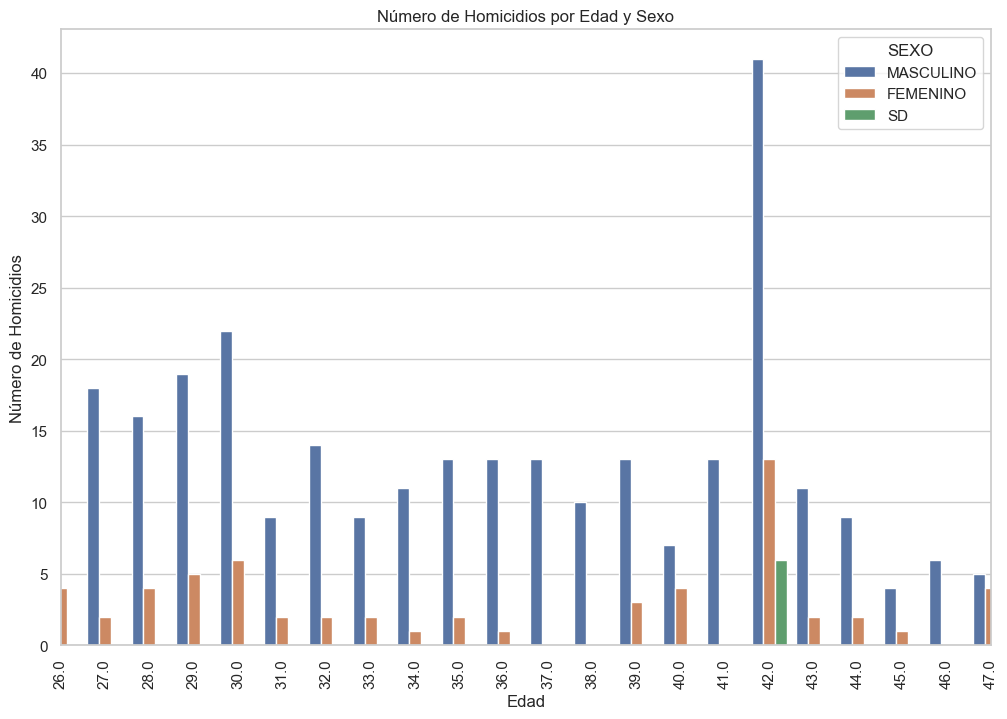

In [44]:
# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=homicidios_victimas_genero, x='EDAD', y='count', hue='SEXO', dodge=True)
plt.xlim(19,40)
# Añadir títulos y etiquetas
plt.title('Número de Homicidios por Edad y Sexo')
plt.xlabel('Edad')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

In [45]:
# Agrupar por ROL y SEXO y contar el número de ocurrencias
homicidios_victimas_rol = homicidios_victimas.groupby(['ROL', 'SEXO']).size().reset_index(name='count').reset_index()
homicidios_victimas_rol

,index,ROL,SEXO,count
0,0,CICLISTA,FEMENINO,8
1,1,CICLISTA,MASCULINO,21
2,2,CONDUCTOR,FEMENINO,20
3,3,CONDUCTOR,MASCULINO,308
4,4,CONDUCTOR,SD,2
5,5,PASAJERO_ACOMPAÑANTE,FEMENINO,34
6,6,PASAJERO_ACOMPAÑANTE,MASCULINO,46
7,7,PEATON,FEMENINO,103
8,8,PEATON,MASCULINO,163
9,9,PEATON,SD,1


In [46]:
# Agrupar por EDAD y AÑO y contar el número de ocurrencias
homicidios_victimas_años = homicidios_victimas.groupby(['VICTIMA', 'AAAA']).size().reset_index(name='count')
homicidios_victimas_años


,VICTIMA,AAAA,count
0,AUTO,2016,18
1,AUTO,2017,25
2,AUTO,2018,17
3,AUTO,2019,11
4,AUTO,2020,12
5,AUTO,2021,11
6,BICICLETA,2016,4
7,BICICLETA,2017,4
8,BICICLETA,2018,3
9,BICICLETA,2019,7


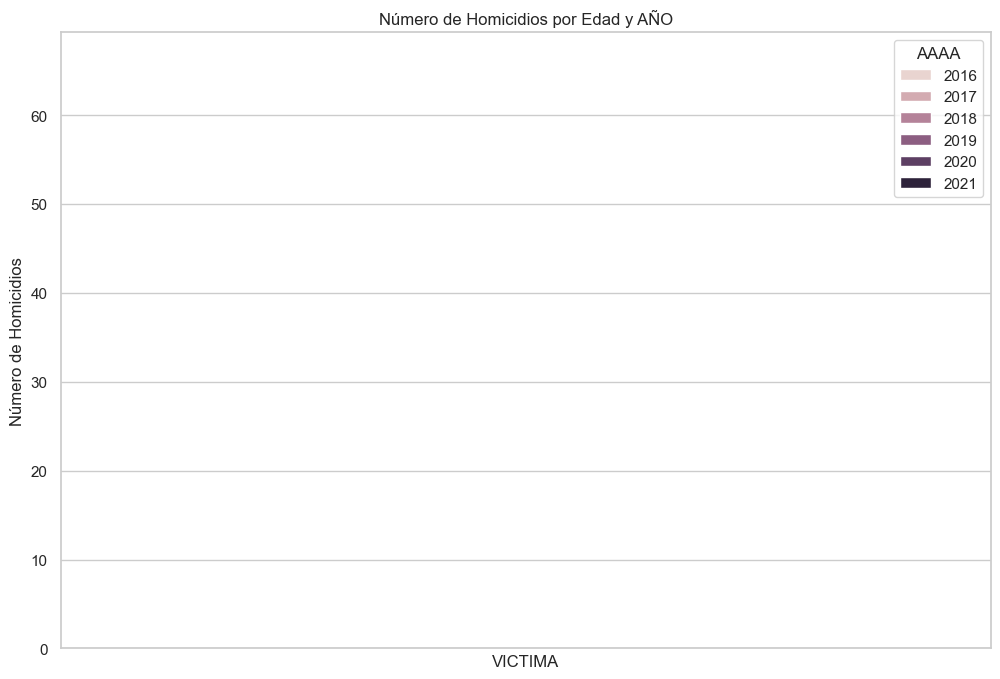

In [47]:
# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=homicidios_victimas_años, x='VICTIMA', y='count', hue='AAAA', dodge=True)
plt.xlim(19,40)
# Añadir títulos y etiquetas
plt.title('Número de Homicidios por Edad y AÑO')
plt.xlabel('VICTIMA')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

#### Aqui podemos saber el numero de victimas por mes y en que se trasportaban

In [48]:
# Agrupar por MM y VICTIMA y contar el número de ocurrencias
homicidios_victimas_mes = homicidios_victimas.groupby(['MM', 'VICTIMA']).size().reset_index(name='count').reset_index()
homicidios_victimas_mes

,index,MM,VICTIMA,count
0,0,1,AUTO,4
1,1,1,BICICLETA,2
2,2,1,CARGAS,1
3,3,1,MOTO,38
4,4,1,PEATON,17
...,...,...,...,...
61,61,12,CARGAS,2
62,62,12,MOTO,39
63,63,12,PASAJEROS,1
64,64,12,PEATON,25


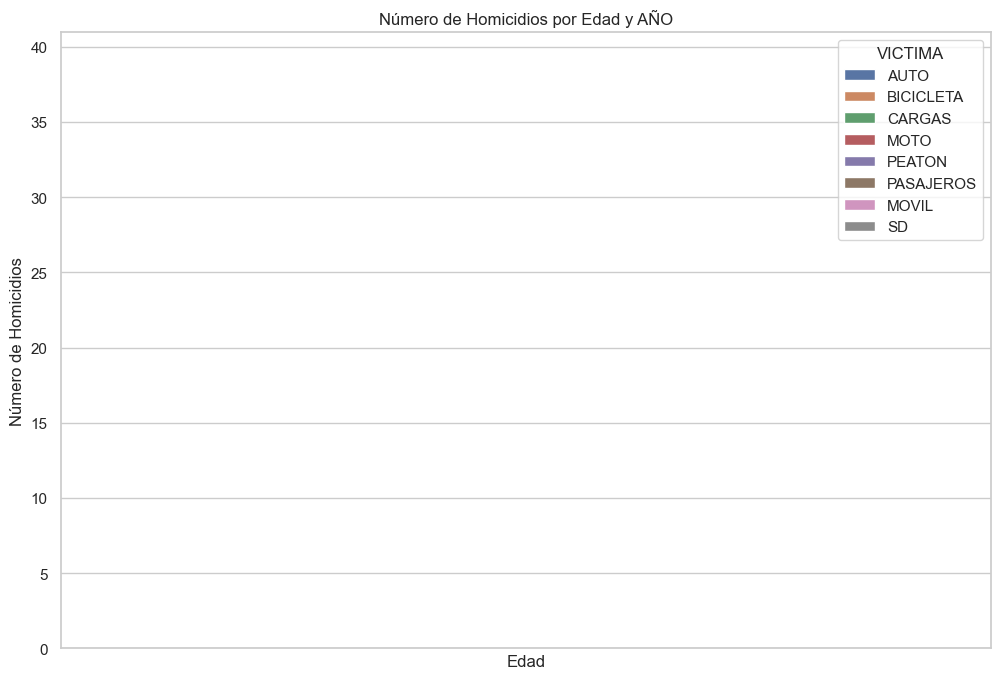

In [49]:
# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=homicidios_victimas_mes, x='MM', y='count', hue='VICTIMA', dodge=True)
plt.xlim(19,40)
# Añadir títulos y etiquetas
plt.title('Número de Homicidios por Edad y AÑO')
plt.xlabel('Edad')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

In [51]:
#guardar el nuevo archivio previamente filtrado
homicidios_hechos.to_csv('../dataset/homicidios_hechos2.csv', index=False, sep=';', encoding='utf-8')

In [50]:
#guardar el nuevo archivio previamente filtrado
homicidios_victimas.to_csv('../dataset/homicidios_victimas2.csv', index=False, sep=';', encoding='utf-8')